# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [296]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [297]:
%pip install --upgrade plotly

### Import Statements

In [298]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta
import matplotlib.dates as mdates

### Notebook Presentation

In [299]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [300]:
df_data = pd.read_csv('mission_launches.csv')


# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [301]:
df_data.shape

(4324, 9)

In [302]:
df_data.head()

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [303]:
df_data.isna().values.any()

True

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [304]:
df_data.duplicated().values.any()

False

In [305]:
print(df_data.columns)

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')


In [306]:
del df_data['Unnamed: 0']

In [307]:
del df_data['Unnamed: 0.1']

In [308]:


df_data.Date = pd.to_datetime(df_data.Date, utc=True)



## Descriptive Statistics

In [309]:
df_data.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4324,4324,4324,4324,4324,964,4324
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",2008-11-05 00:15:00+00:00,Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3879
first,NaN,NaN,1957-10-04 19:28:00+00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,2020-08-07 05:12:00+00:00,NaN,NaN,NaN,NaN


In [310]:
df_data[df_data.Organisation == 'RVSN USSR']

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
1299,RVSN USSR,"Site 41/1, Plesetsk Cosmodrome, Russia",1998-08-12 12:53:00+00:00,Molniya-M /Block ML | Molniya-1 n†­133,StatusRetired,NaN,Success
1427,RVSN USSR,"Site 43/3, Plesetsk Cosmodrome, Russia",1996-08-29 05:22:00+00:00,"Molniya-M /Block SO-L | Interbol 2, Magion5 & ...",StatusRetired,NaN,Success
1497,RVSN USSR,"Site 43/3, Plesetsk Cosmodrome, Russia",1995-08-02 23:59:00+00:00,Molniya-M /Block SO-L | Interbol 1 & Magion 4,StatusRetired,NaN,Success
1689,RVSN USSR,"Site 32/1, Plesetsk Cosmodrome, Russia",1992-07-13 17:41:00+00:00,Tsyklon-3 | Cosmos 2197 to 2202,StatusRetired,NaN,Success
1691,RVSN USSR,"Site 43/3, Plesetsk Cosmodrome, Russia",1992-07-08 09:53:00+00:00,Molniya-M /Block 2BL | Cosmos 2196,StatusRetired,NaN,Success
...,...,...,...,...,...,...,...
4301,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-09-23 07:40:00+00:00,Vostok | E-1 n†­1 (Luna-1),StatusRetired,NaN,Failure
4313,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-05-15 07:12:00+00:00,Sputnik 8A91 | Sputnik-3 #2,StatusRetired,NaN,Success
4315,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-04-27 09:01:00+00:00,Sputnik 8A91 | Sputnik-3 #1,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [311]:
df_data.Organisation.nunique()

56

In [312]:
launches_per_organisation = df_data.Organisation.value_counts()
launches_per_organisation

RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
ISA                   13
Rocket Lab            13
Eurockot              13
ESA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
MITT                   7
JAXA                   7
Land Launch            7
UT                     5
KCST                   5
CASIC                  5
Exos                   4
CECLES                 4
Arm??e de l'Air        4


In [313]:
bar = px.bar(
        x = launches_per_organisation.index[:15], # index = category name
        y = launches_per_organisation.values[:15], # count
        title='Top Organisations',
        hover_name=launches_per_organisation.index[:15],
        color=launches_per_organisation.values[:15],
        color_continuous_scale='Agsunset'
)

bar.update_layout(xaxis_title='Number of Launches',
                  yaxis_title='Organisations',
                  coloraxis_showscale=False)

bar.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [314]:
    rockets = df_data.groupby(['Organisation', 'Rocket_Status'], 
                                   as_index=False).agg({'Date': pd.Series.count})
    rockets.sort_values('Date', ascending=False, inplace=True)

In [315]:
retired_vs_active_rockets_data = df_data.Rocket_Status.value_counts()

In [316]:
    v_bar_split = px.bar(x = retired_vs_active_rockets_data.index[:20],
                         y = retired_vs_active_rockets_data.values[:20],
                         color = retired_vs_active_rockets_data.index[:20],
                         title='Number of Active versus Retired Rockets')
     
    v_bar_split.update_layout(xaxis_title='Status', 
                              yaxis_title='Number of Rockets')
    v_bar_split.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [317]:
distribution_data = df_data.Mission_Status.value_counts()

In [318]:
distribution_data

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

In [319]:
fig = px.pie(labels=distribution_data.index, 
             values=distribution_data.values,
             title="Distribution of Mission Status",
             names=distribution_data.index,
)
fig.update_traces(textposition='outside', textinfo='percent+label')

fig.show()

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [320]:
new_data = df_data
data_without_na = new_data.dropna()

In [321]:
data_without_na.Price = data_without_na.Price.astype(str).str.replace(',', "")
data_without_na.Price = pd.to_numeric(data_without_na.Price)
data_without_na.dtypes



/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Organisation                   object
Location                       object
Date              datetime64[ns, UTC]
Detail                         object
Rocket_Status                  object
Price                         float64
Mission_Status                 object
dtype: object

In [322]:
data_without_na.dtypes

Organisation                   object
Location                       object
Date              datetime64[ns, UTC]
Detail                         object
Rocket_Status                  object
Price                         float64
Mission_Status                 object
dtype: object

In [323]:
launch_expens = data_without_na.groupby(['Organisation'], as_index=False).agg({'Price': pd.Series.sum})
launch_expens.sort_values('Price', ascending=False, inplace=True)

In [324]:
    v_bar_split = px.bar(x = launch_expens.Organisation[:10],
                         y = launch_expens.Price[:10],
                         color = launch_expens.Organisation[:10],
                         title='Number of millions TOP 10 organisations spent on launches (with known data)')
     
    v_bar_split.update_layout(xaxis_title='Organisations', 
                              yaxis_title='Number of $ Millions')
    v_bar_split.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [325]:
df_without_price = df_data
df_without_price.drop('Price', inplace=True, axis=1)

renamed_df = df_without_price
renamed_df.Location = renamed_df.Location.str.replace("USA","UNITED STATES OF AMERICA")
renamed_df.Location = renamed_df.Location.str.replace("Gran Canaria","UNITED STATES OF AMERICA")
renamed_df.Location = renamed_df.Location.str.replace("Russia","RUSSIAN FEDERATION")
renamed_df.Location = renamed_df.Location.str.replace("Barents Sea","RUSSIAN FEDERATION")
renamed_df.Location = renamed_df.Location.str.replace("New Mexico","UNITED STATES OF AMERICA")
renamed_df.Location = renamed_df.Location.str.replace("Yellow Sea","CHINA")
renamed_df.Location = renamed_df.Location.str.replace("Shahrud Missile Test Site","Iran")
renamed_df.Location = renamed_df.Location.str.replace("Pacific Ocean","UNITED STATES OF AMERICA")
renamed_df.Location = renamed_df.Location.str.replace("Pacific Missile Range Facility","UNITED STATES OF AMERICA")
 
### Step 2 ###
df_country = renamed_df["Location"].str.split(",", expand=True).reset_index()
df_country[3] = df_country[3].str.lstrip(" ")
 
### Step 3 ###
col_1 = df_country[1]
col_2 = df_country[2]
col_3 = df_country[3]
new_df = []
for one, two, three in zip(col_1, col_2, col_3):
    if three is None:
        three = two
    if three is None:
        three = one
    new_df.append(three)
 
### Step 4 & 5. I use this step to find out any KeyError countries, added it on to Step 1 and re-run the Kernel until all Countries have been captured ###
import iso3166
country_iso = []
for country in new_df:
    country = country.lstrip(" ")
    if country == "Iran":
        country = "IRAN, ISLAMIC REPUBLIC OF"
    if country == "North Korea":
        country = "KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF"
    if country == "South Korea":
        country = "KOREA, REPUBLIC OF"
    try:
        country_iso.append(iso3166.countries_by_name[country.upper()][2])
    except KeyError:
        print (country)
 
### Step 6 & 7###
df_without_price["Country_ISO"] = pd.DataFrame(country_iso)
 
choro_df_launches = df_without_price.groupby(["Country_ISO"], as_index=False).agg({"Detail":pd.Series.count})
choro_df_launches.rename(columns={"Detail":"Launch_Counts"}, inplace=True)
choro_df_launches.sort_values("Launch_Counts", ascending=False)
 
fig = px.choropleth(choro_df_launches, locations="Country_ISO", color="Launch_Counts", color_continuous_scale="sunsetdark")
fig.show()

In [326]:
df_without_price

,Organisation,Location,Date,Detail,Rocket_Status,Mission_Status,Country_ISO
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, UNITED ...",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,Success,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, UNITED STATES OF AME...",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,Success,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, UNITED ST...",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,Success,USA
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, UNITED ST...",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,Failure,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, UNITED ST...",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,Success,USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, UNITED ST...",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,Failure,USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,Success,KAZ


In [327]:
choro_df_launches

,Country_ISO,Launch_Counts
0,AUS,6
1,BRA,3
2,CHN,269
3,FRA,303
4,IND,76
5,IRN,14
6,ISR,11
7,JPN,126
8,KAZ,701
9,KEN,9


# Use a Choropleth Map to Show the Number of Failures by Country


In [328]:
number_of_failures = df_without_price.groupby(['Organisation','Mission_Status'], as_index=False).agg({'Detail':pd.Series.count})

In [329]:
number_of_failures = df_without_price.query("Mission_Status == 'Failure' or Mission_Status == 'Prelaunch Failure' or Mission_Status == 'Partial Failure'")

In [330]:
number_of_failures = number_of_failures.groupby(["Country_ISO"], as_index=False).agg({"Mission_Status":pd.Series.count})


In [331]:
number_of_failures.rename(columns={"Mission_Status":"Number_of_failures"}, inplace=True)

fig = px.choropleth(number_of_failures, locations="Country_ISO", color="Number_of_failures", color_continuous_scale="sunsetdark")
fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [332]:
a = df_without_price[['Country_ISO', 'Organisation','Mission_Status']]

In [333]:
    fig = px.sunburst(a, path=['Country_ISO', 'Organisation', 'Mission_Status'])
    fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [334]:
df_budget = data_without_na.groupby(['Organisation'], as_index=False).agg({'Price': pd.Series.sum})

In [335]:


v_bar = px.bar(x=df_budget.Price,
               y=df_budget.Organisation,
               color=df_budget.Price,
               orientation='h',
               color_continuous_scale='Plasma',
               title=f'Spread over total spending of {df_budget.Price.sum()} million')
 
v_bar.update_layout(xaxis_title='Price in million', 
                    yaxis_title='Organisations',
                    yaxis={'categoryorder':'total ascending'})
v_bar.show()



# Analyse the Amount of Money Spent by Organisation per Launch

In [336]:
df_average = data_without_na.groupby(['Organisation'], as_index=False).agg({'Price': pd.Series.mean})

In [337]:


v_bar = px.bar(x=df_average.Price,
               y=df_average.Organisation,
               color=df_average.Price,
               orientation='h',
               color_continuous_scale='Plasma',
               title=f'Spread over total spending of {df_average.Price.sum()} million')
 
v_bar.update_layout(xaxis_title='Price in million', 
                    yaxis_title='Organisations',
                    yaxis={'categoryorder':'total ascending'})
v_bar.show()



# Chart the Number of Launches per Year

In [338]:
df_data['year'] = pd.DatetimeIndex(df_data.Date).year
per_year_data = df_data.year.value_counts()

In [339]:
per_year_data.sort_index(inplace=True)
moving_average = per_year_data.rolling(window=5).mean()

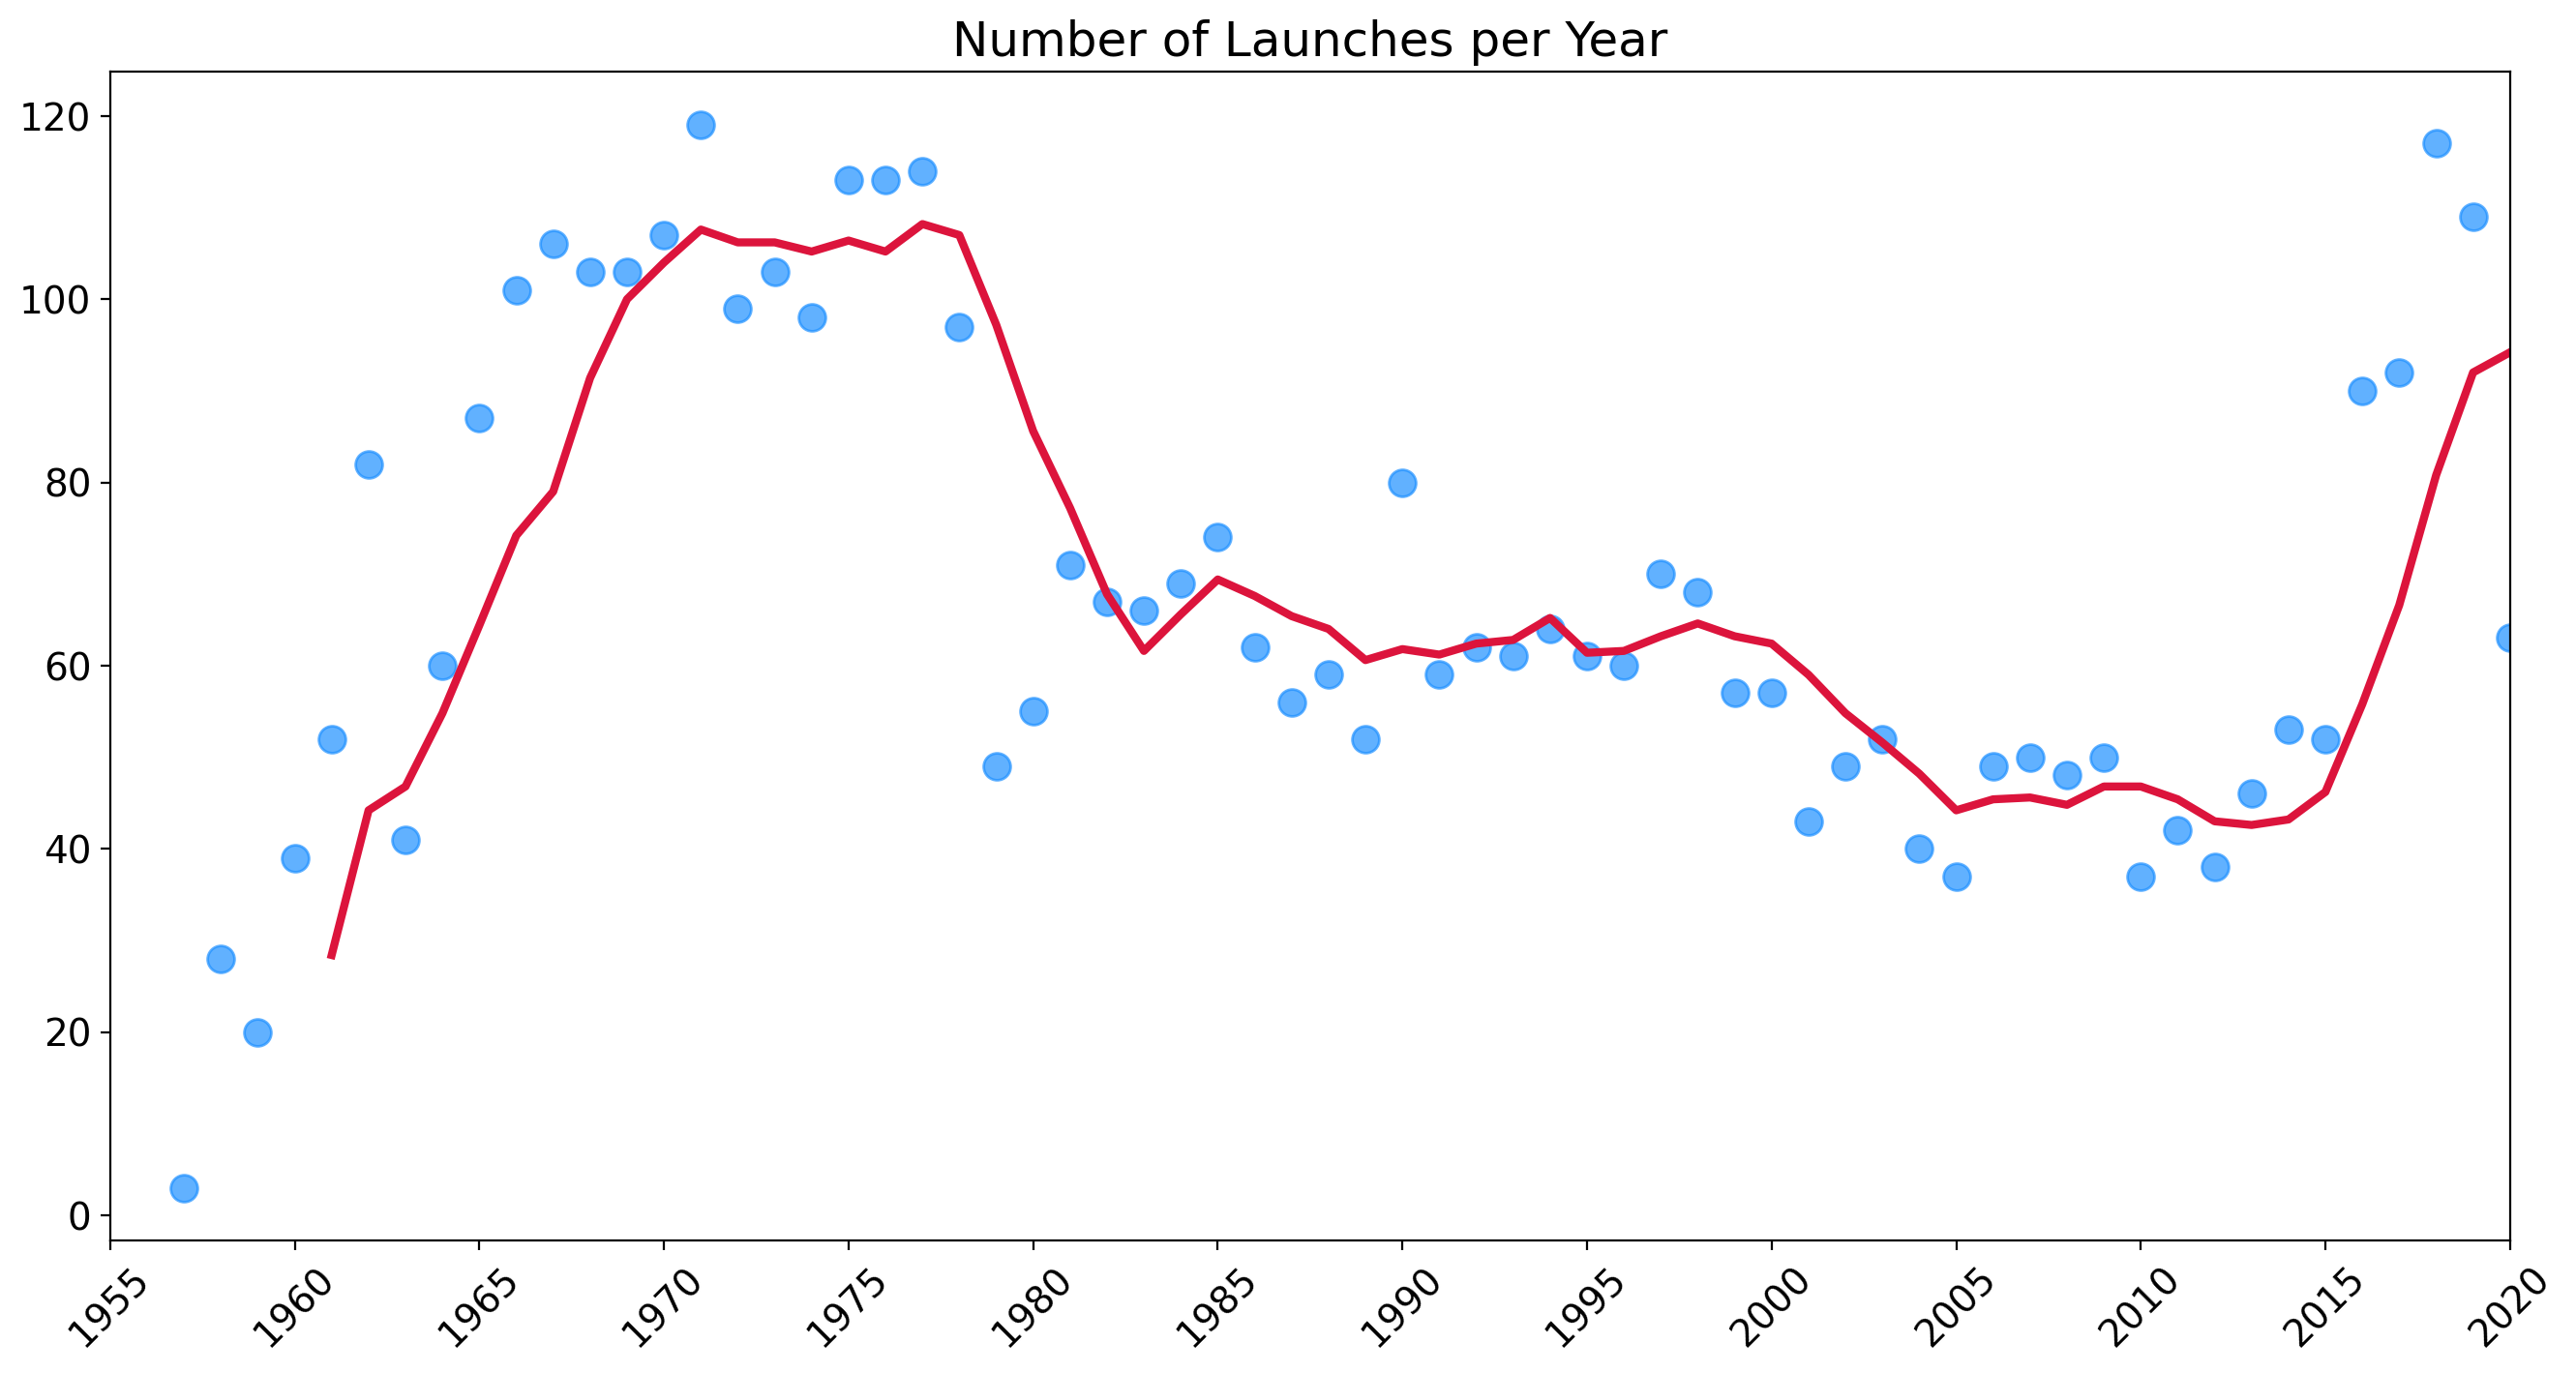

In [340]:
    plt.figure(figsize=(16,8), dpi=200)
    plt.title('Number of Launches per Year', fontsize=18)
    plt.yticks(fontsize=14)
    plt.xticks(ticks=np.arange(1900, 2021, step=5), 
               fontsize=14, 
               rotation=45)
     
    ax = plt.gca() # get current axis
    ax.set_xlim(1955, 2020)
     
    ax.scatter(x=per_year_data.index, 
               y=per_year_data.values, 
               c='dodgerblue',
               alpha=0.7,
               s=100,)
    ax.plot(per_year_data.index, 
            moving_average.values, 
            c='crimson', 
            linewidth=3,)
     
     

     
    plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [341]:
df_data['month'] = pd.DatetimeIndex(df_data.Date).month
per_month_data = df_data.groupby(['year', 'month'], as_index=False).agg({'Mission_Status' : pd.Series.count})
per_month_data['date'] = pd.to_datetime(per_month_data[['year', 'month']].assign(DAY=1))
df_rolling = per_month_data.set_index('date').rolling(window=12).mean()
df_rolling

,year,month,Mission_Status
date,,,
1957-10-01,NaN,NaN,NaN
1957-11-01,NaN,NaN,NaN
1957-12-01,NaN,NaN,NaN
1958-02-01,NaN,NaN,NaN
1958-03-01,NaN,NaN,NaN
...,...,...,...
2020-04-01,"2,019.33",6.50,9.17
2020-05-01,"2,019.42",6.50,9.17
2020-06-01,"2,019.50",6.50,9.17


In [342]:
line = px.line(df_rolling,
               x=df_rolling.index,
               y='Mission_Status',
               title='Number of Launches on Monthly Basis', )
line.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [343]:
pop_months = df_data.month.value_counts()

In [344]:


chart = px.bar(
    x=pop_months.index,
    y=pop_months.values,
    title = 'Number of Launches per Month',
    color=pop_months.values,
    color_continuous_scale='inferno'
)
chart.update_layout(xaxis_title='Month', yaxis_title='Space Mission Launches')
chart.show()



# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [345]:
m_average = data_without_na[['Price', 'Date', 'Organisation']]
m_average = m_average.set_index('Date').rolling(window=12).mean()
line = px.line(m_average,
              y=m_average.Price,
              x=m_average.index,
              title='World Launch Price over time')
line.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [346]:
top10_launch_org = df_data.groupby(['Organisation', 'Date'], as_index=False).agg({'Mission_Status': pd.Series.count})

In [347]:
total_top10 = top10_launch_org.groupby('Organisation', as_index=False).agg({'Mission_Status': pd.Series.sum})

In [348]:
df_final = pd.merge(
    top10_launch_org, total_top10, 
    on=['Organisation'], how='inner')

organization_by_year = df_data.groupby(['Organisation', 'Date'], as_index=False).count()[['Organisation', 'Date', 'Mission_Status']]
cumulative_price = organization_by_year.groupby(by=['Organisation', 'Date']).sum().groupby(level=[0]).cumsum()
cumulative_price.reset_index(inplace=True)

df_final = pd.merge(
    df_final, cumulative_price, 
    on=['Organisation'], how='inner')


top10_organisations = df_final.sort_values('Mission_Status_y', ascending=False).groupby('Organisation', as_index=False).head(10)



In [349]:
cumulative_price

,Organisation,Date,Mission_Status
0,AEB,1997-11-02 00:00:00+00:00,1
1,AEB,1999-12-11 19:40:00+00:00,2
2,AEB,2003-08-25 00:00:00+00:00,3
3,AMBA,1958-02-01 03:48:00+00:00,1
4,AMBA,1958-03-05 18:27:00+00:00,2
...,...,...,...
4315,VKS RF,2020-05-22 07:31:00+00:00,201
4316,Virgin Orbit,2020-05-25 19:50:00+00:00,1
4317,Yuzhmash,1969-11-01 10:59:00+00:00,1
4318,Yuzhmash,1991-12-18 03:54:00+00:00,2


In [350]:
l_chart = px.line(cumulative_price,
                  x='Date', 
                  y='Mission_Status',
                  color='Organisation',
                  hover_name='Organisation',
                 title='Top 10 Organisation Number of Launches')
 
l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of Mission')
 
l_chart.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [351]:
df_data["Country_ISO"] = pd.DataFrame(country_iso)


In [352]:
df_cold_war = df_data.loc[((df_data.Country_ISO == 'RUS')  | (df_data.Country_ISO == 'USA')  | (df_data.Country_ISO == 'KAZ'))  & 
                          (df_data.year < 1991)]
df_cold_war.Country_ISO.replace('KAZ', 'RUS', inplace=True)
df_cold_war.Country_ISO.unique()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array(['RUS', 'USA'], dtype=object)

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [353]:
df_cold_war = df_cold_war.Country_ISO.value_counts()

In [354]:
df_cold_war

RUS    1741
USA     644
Name: Country_ISO, dtype: int64

In [355]:
fig = px.pie(labels=df_cold_war.index, 
             values=df_cold_war.values,
             title="The total number of launches of the USSR and the USA",
             names=df_cold_war.index,
             
)
fig.update_traces(textposition='outside', textinfo='percent+label')

fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [356]:

df_cold_war = df_data.loc[((df_data.Country_ISO == 'RUS')  | (df_data.Country_ISO == 'USA')  | (df_data.Country_ISO == 'KAZ'))  & 
                          (df_data.year < 1991)]
df_cold_war.Country_ISO.replace('KAZ', 'RUS', inplace=True)
battle_launch = df_cold_war.groupby(['Country_ISO', 'year'], as_index=False).agg({'Organisation': pd.Series.count})




/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [357]:
fig = px.bar(
    battle_launch, 
    x='year', y='Organisation', 
    title='Total Number of Launches Year-On-Year (US vs USSR)', 
    color='Country_ISO', barmode='relative')
fig.update_layout(
    xaxis_title='Year', 
    yaxis_title='Number of Launches') 
#     xaxis={'categoryorder':'total descending'})
fig.show()



## Chart the Total Number of Mission Failures Year on Year.

In [358]:
df_cold_war_ru = df_data.loc[((df_data.Country_ISO == 'RUS')  | (df_data.Country_ISO == 'KAZ'))  & 
                          (df_data.year < 1991) & ((df_data.Mission_Status == 'Failure') | (df_data.Mission_Status == 'Partial Failure') | (df_data.Mission_Status == 'Prelaunch Failure'))]
df_cold_war.Country_ISO.replace('KAZ', 'RUS', inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [359]:
df_cold_war_us = df_data.loc[((df_data.Country_ISO == 'USA'))  & 
                          (df_data.year < 1991) & ((df_data.Mission_Status == 'Failure') | (df_data.Mission_Status == 'Partial Failure') | (df_data.Mission_Status == 'Prelaunch Failure'))]


In [360]:
df_cold_war_ru = df_cold_war_ru.groupby(by='year').count().Mission_Status
df_cold_war_us = df_cold_war_us.groupby(by='year').count().Mission_Status

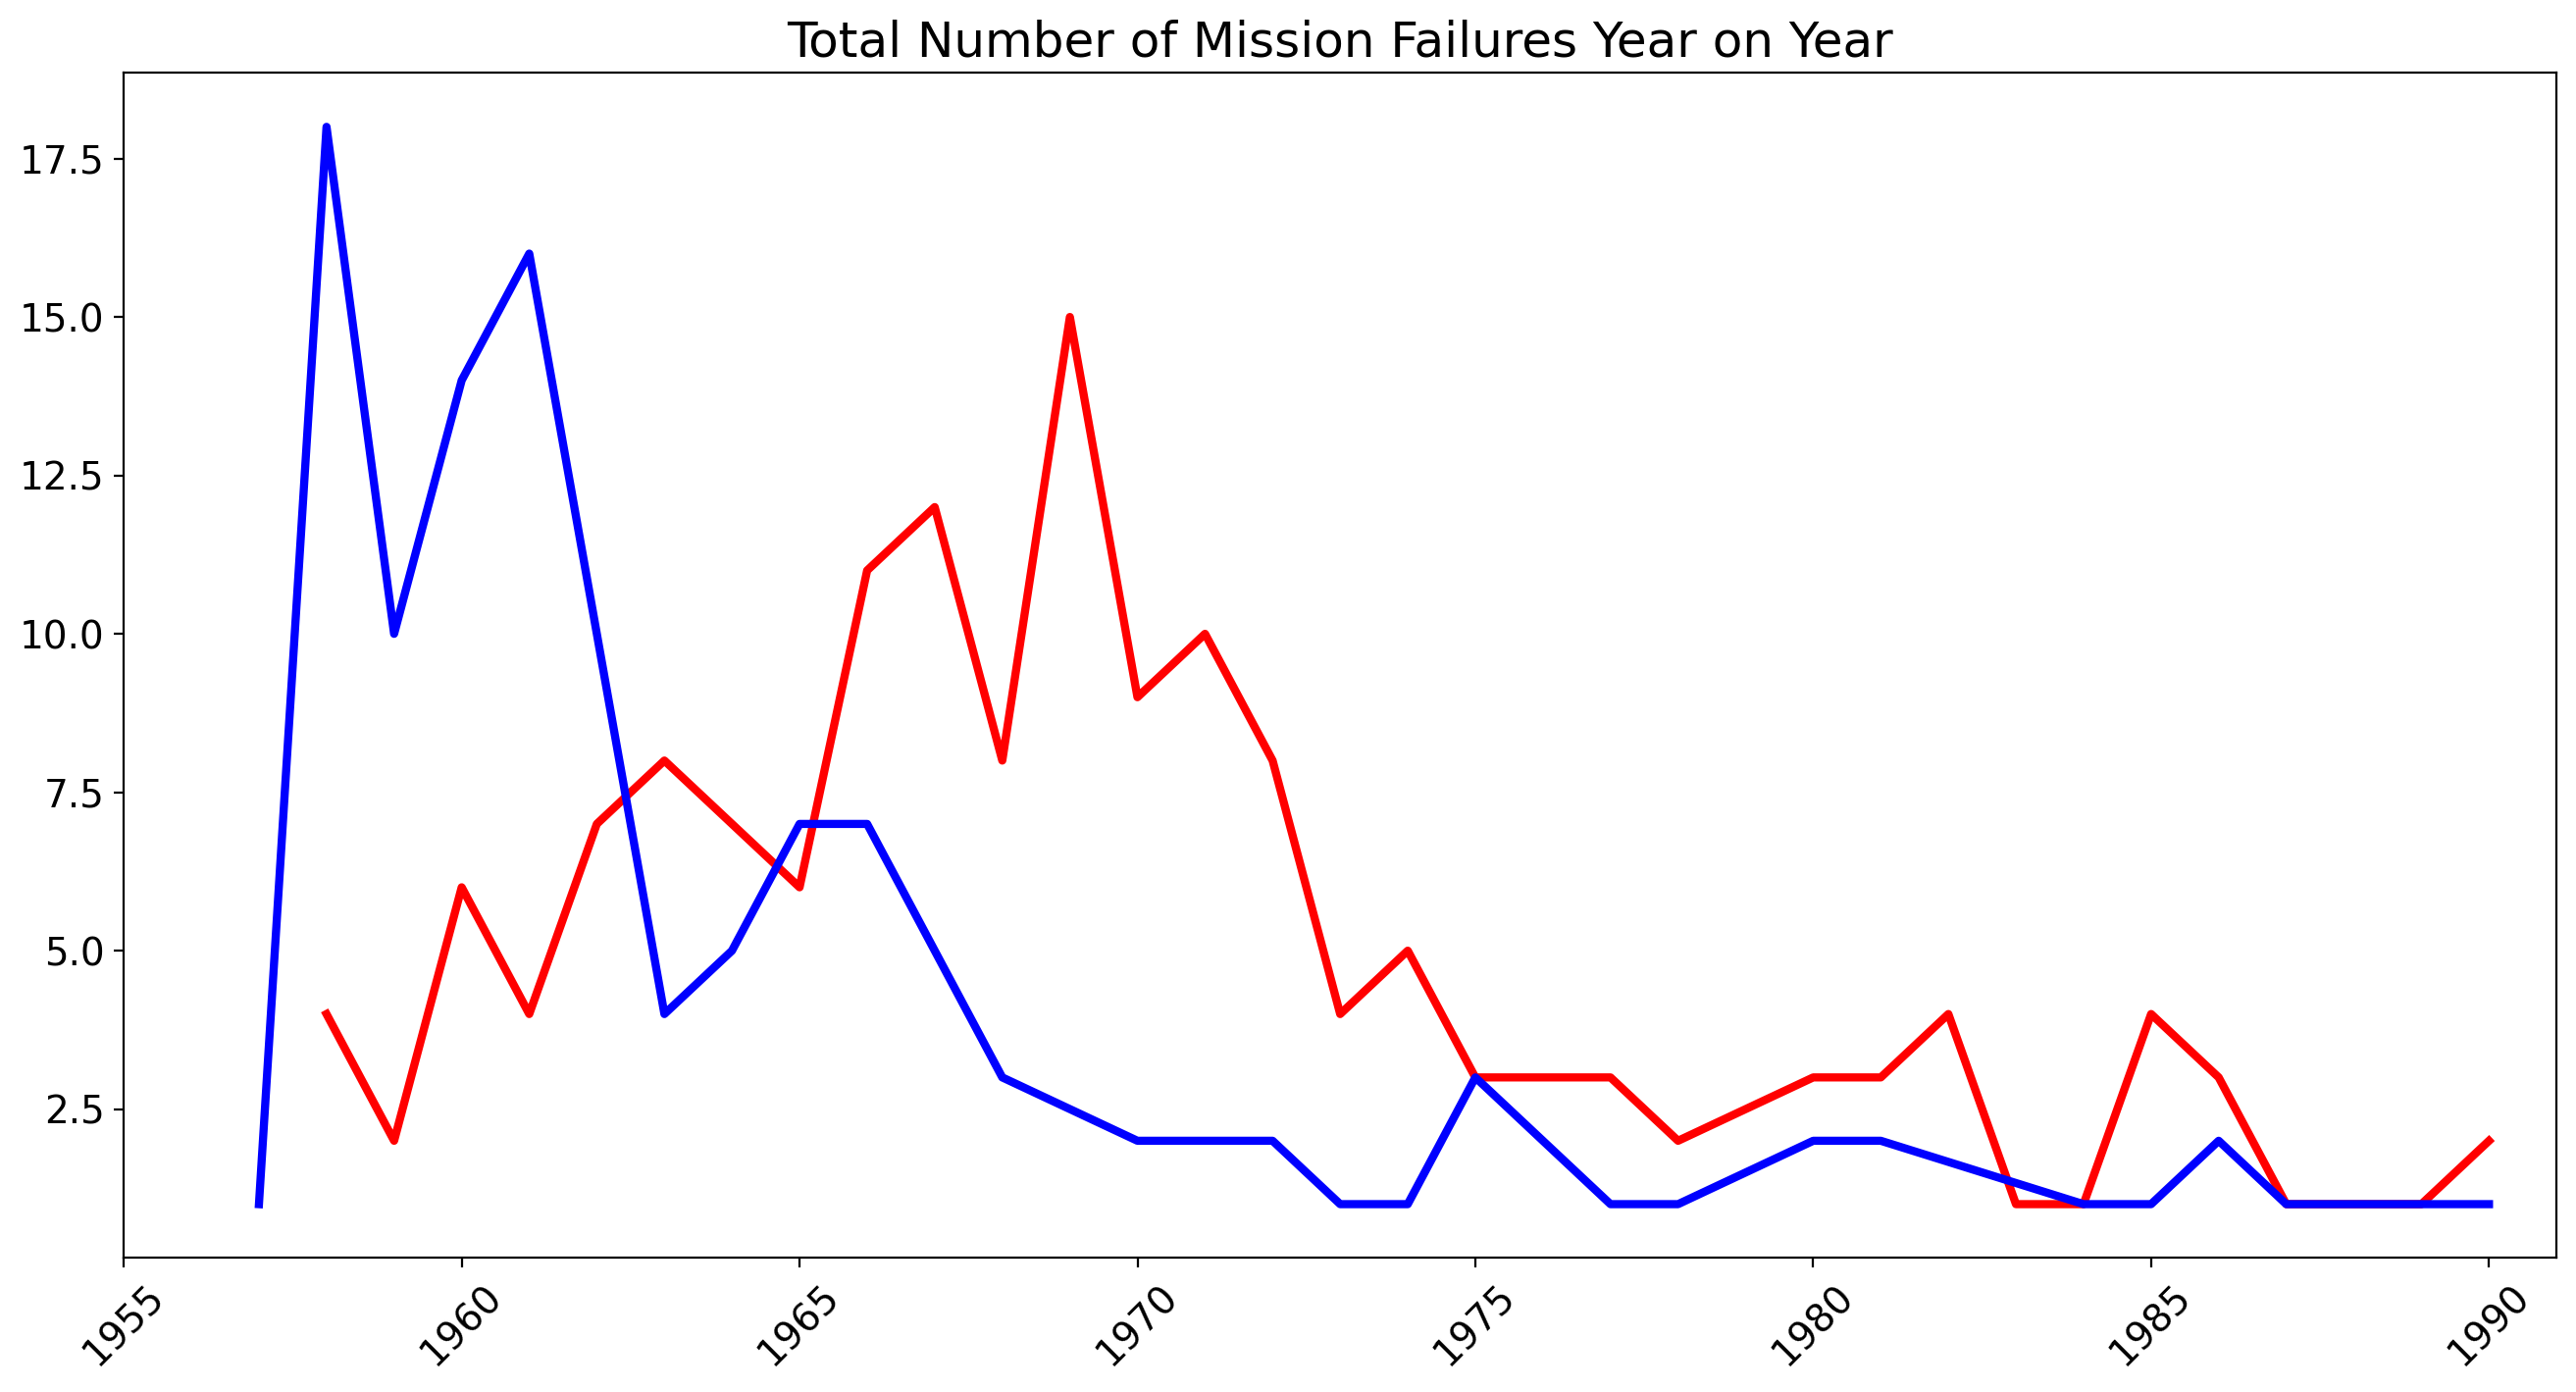

In [361]:
    plt.figure(figsize=(16,8), dpi=200)
    plt.title('Total Number of Mission Failures Year on Year', fontsize=18)
    plt.yticks(fontsize=14)
    plt.xticks(ticks=np.arange(1900, 2021, step=5), 
               fontsize=14, 
               rotation=45)
     
    ax = plt.gca() # get current axis
    ax.set_xlim(1955, 1991)
     
    ax.plot(df_cold_war_ru.index, 
            df_cold_war_ru.values, 
            c='red', 
            linewidth=3,)
    
    ax.plot(df_cold_war_us.index, 
            df_cold_war_us.values, 
            c='blue', 
            linewidth=3,)
     
    
     
    plt.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [362]:
df_failure_us = df_data.loc[((df_data.Country_ISO == 'USA'))  & 
                          (df_data.year < 1991) & ((df_data.Mission_Status == 'Failure') | (df_data.Mission_Status == 'Partial Failure') | (df_data.Mission_Status == 'Prelaunch Failure'))]
df_failure_us = df_failure_us.groupby(['Country_ISO', 'year'], as_index=False).count()[['Country_ISO', 'year', 'Mission_Status']]
df_success_us = df_data.loc[((df_data.Country_ISO == 'USA'))  & 
                          (df_data.year < 1991) & (df_data.Mission_Status == 'Success')]
df_success_us = df_success_us.groupby(['Country_ISO', 'year'], as_index=False).count()[['Country_ISO', 'year', 'Mission_Status']]

In [363]:
print(df_success_us.head(3))
print(df_failure_us.head(3))


  Country_ISO  year  Mission_Status
0         USA  1958               5
1         USA  1959               6
2         USA  1960              16
  Country_ISO  year  Mission_Status
0         USA  1957               1
1         USA  1958              18
2         USA  1959              10


In [364]:
us_merged = pd.merge(df_failure_us, df_success_us, on='year')
us_merged.rename(columns={"Mission_Status_x":"Failure","Mission_Status_y":"Success"}, inplace=True)
del us_merged['Country_ISO_y']
us_merged['percent_failures'] = (us_merged['Failure'] / (us_merged['Failure'] +
                  us_merged['Success'])) * 100
us_merged

,Country_ISO_x,year,Failure,Success,percent_failures
0,USA,1958,18,5,78.26
1,USA,1959,10,6,62.50
2,USA,1960,14,16,46.67
3,USA,1961,16,27,37.21
4,USA,1962,10,50,16.67
5,USA,1963,4,13,23.53
6,USA,1964,5,19,20.83
7,USA,1965,7,26,21.21
8,USA,1966,7,40,14.89
9,USA,1967,5,21,19.23


In [365]:
df_data.Country_ISO.replace('KAZ', 'RUS', inplace=True)
df_failure_ru = df_data.loc[((df_data.Country_ISO == 'RUS'))  & 
                          (df_data.year < 1991) & ((df_data.Mission_Status == 'Failure') | (df_data.Mission_Status == 'Partial Failure') | (df_data.Mission_Status == 'Prelaunch Failure'))]
df_failure_ru = df_failure_ru.groupby(['Country_ISO', 'year'], as_index=False).count()[['Country_ISO', 'year', 'Mission_Status']]
df_success_ru = df_data.loc[((df_data.Country_ISO == 'RUS'))  & 
                          (df_data.year < 1991) & (df_data.Mission_Status == 'Success')]
df_success_ru = df_success_ru.groupby(['Country_ISO', 'year'], as_index=False).count()[['Country_ISO', 'year', 'Mission_Status']]


ru_merged = pd.merge(df_failure_ru, df_success_ru, on='year')
ru_merged.rename(columns={"Mission_Status_x":"Failure","Mission_Status_y":"Success"}, inplace=True)
del ru_merged['Country_ISO_y']
ru_merged['percent_failures'] = (ru_merged['Failure'] / (ru_merged['Failure'] +
                  ru_merged['Success'])) * 100
ru_merged

,Country_ISO_x,year,Failure,Success,percent_failures
0,RUS,1958,4,1,80.00
1,RUS,1959,2,2,50.00
2,RUS,1960,6,3,66.67
3,RUS,1961,4,5,44.44
4,RUS,1962,7,15,31.82
5,RUS,1963,8,16,33.33
6,RUS,1964,7,29,19.44
7,RUS,1965,6,47,11.32
8,RUS,1966,11,40,21.57
9,RUS,1967,12,63,16.00


In [366]:
df_success_ru

,Country_ISO,year,Mission_Status
0,RUS,1957,2
1,RUS,1958,1
2,RUS,1959,2
3,RUS,1960,3
4,RUS,1961,5
5,RUS,1962,15
6,RUS,1963,16
7,RUS,1964,29
8,RUS,1965,47
9,RUS,1966,40


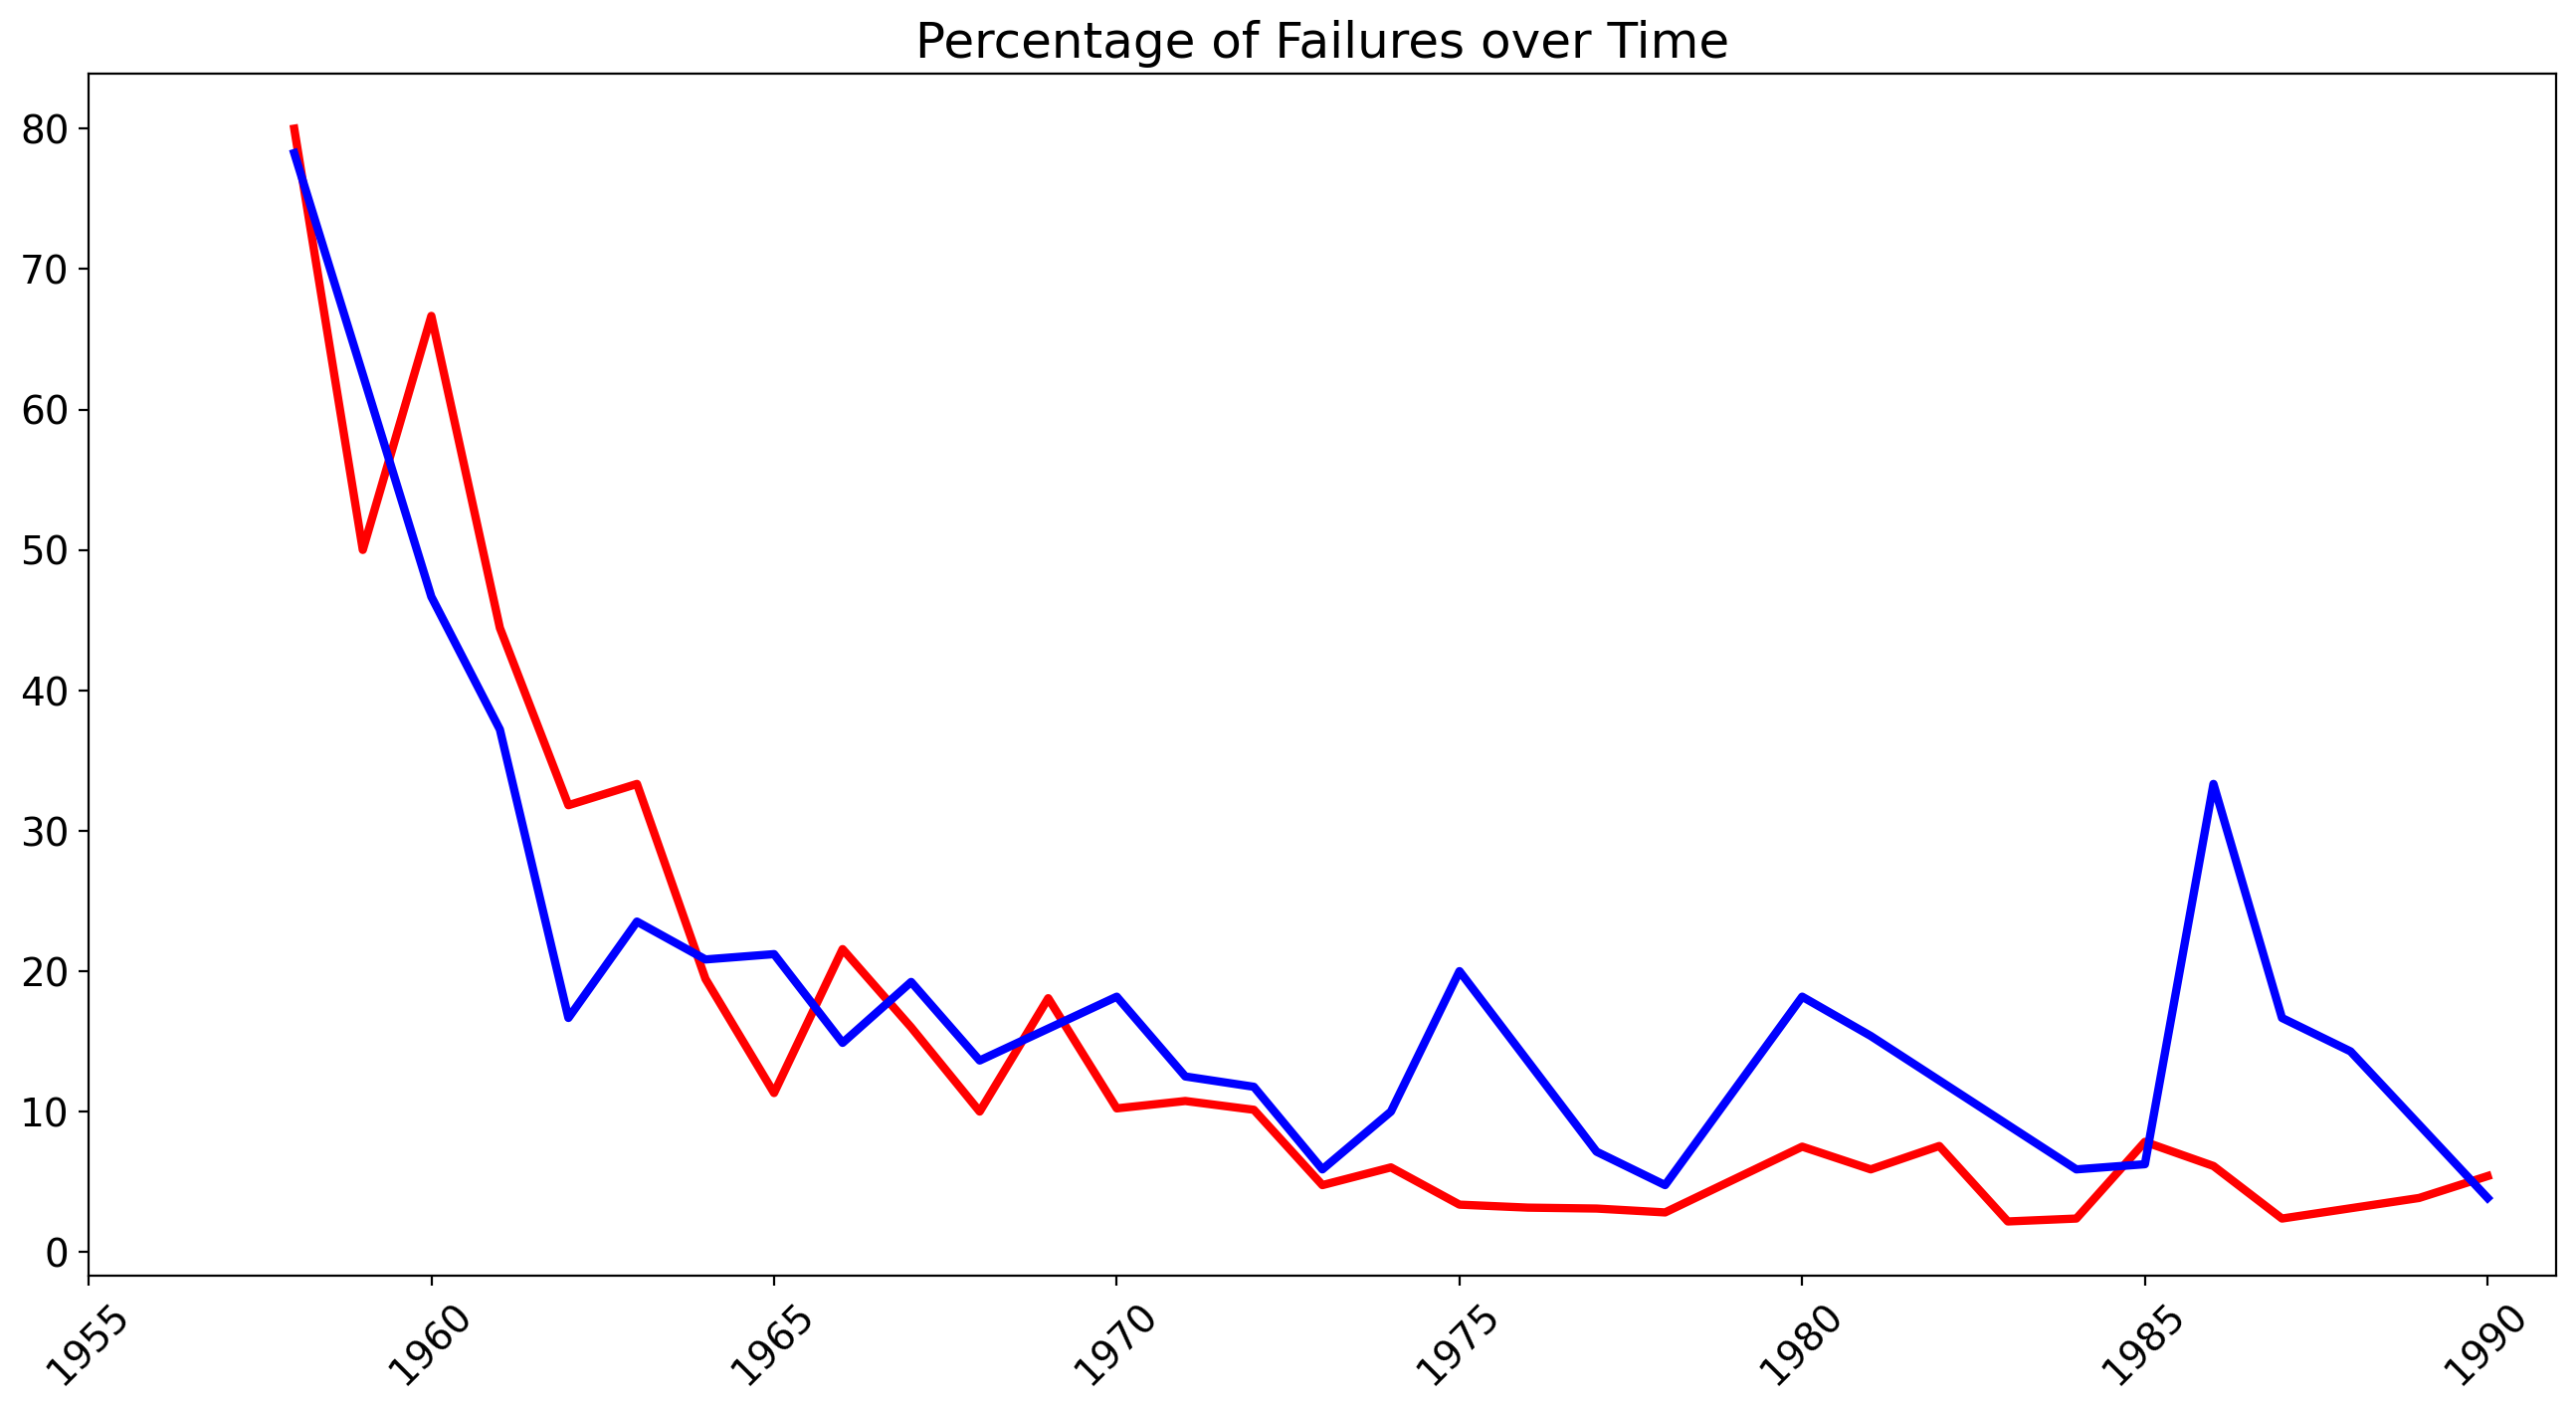

In [367]:
    plt.figure(figsize=(16,8), dpi=200)
    plt.title('Percentage of Failures over Time', fontsize=18)
    plt.yticks(fontsize=14)
    plt.xticks(ticks=np.arange(1900, 2021, step=5), 
               fontsize=14, 
               rotation=45)
     
    ax = plt.gca() # get current axis
    ax.set_xlim(1955, 1991)
     
    ax.plot(ru_merged.year, 
            ru_merged.percent_failures, 
            c='red', 
            linewidth=3,)
    
    ax.plot(us_merged.year, 
            us_merged.percent_failures, 
            c='blue', 
            linewidth=3,)
     
    
     
    plt.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [368]:
leaders= df_data.groupby(['year', 'Country_ISO'], as_index=False).agg({'Mission_Status': pd.Series.count})

In [369]:


fig = px.line(x=leaders.year, 
              y=leaders.Mission_Status, 
              color=leaders.Country_ISO)
fig.update_layout(xaxis_range=[1950, 2021])
fig.show()



# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [370]:


fig = px.line(x=leaders.year, 
              y=leaders.Mission_Status, 
              color=leaders.Country_ISO)
fig.update_layout(xaxis_range=[1969, 1990])
fig.show()



In [371]:


fig = px.line(x=leaders.year, 
              y=leaders.Mission_Status, 
              color=leaders.Country_ISO)
fig.update_layout(xaxis_range=[2018, 2021])
fig.show()

